In [1]:
from ivisual import *
import numpy as np
from numpy import linalg as LA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
############ Load the atom positions and spin directions.(only read limited some atoms in order in the filed)
###############################################################

###Ｒｅａｄ　ｏｎｅ　ｆｉｌｅ：　read part 
#fpath1=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_spins_01.txt'
#fpath1=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\large_supercell\tho_100mk-160k_binned_addPara4900_spins_01.txt'
fpath1=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_binned_addPara4900_easy_plane\tho_100mk-160k_binned_addPara4900_spins_01.txt'
#fpath1=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_binned_addPara4900_spins_01.txt'

nbatom=16 #no of atoms to read in the file
atpos=np.zeros([16,3]) #store atom positons in a unit cell
allpos=np.zeros([nbatom,3])#store atom positons in a super cell
spins =np.zeros([nbatom,3])#store spins in a super cell
#read data
with open(fpath1, 'rU') as f:
    i=0
    for line in f:
        line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
        if line[0]=="SITE":
            atpos[i,:]=line[1:]#automatically convert string to np.array
            i=i+1
with open(fpath1, 'rU') as f:
    i=0        
    for line in f:        
        line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
        if line[0]=="SPIN":
            allpos[i,:]=np.array(line[2:5],dtype='f8')+atpos[int(line[1])-1,:]
            spins[i,:]=line[5:8]
            i=i+1
            if i==nbatom:
                break
#print(allpos,spins)

##### find the nearest neighers
bonds = np.zeros([5,1000])#store the 30 bonds in the unitCell: atom1,atom2,pos[a2]-pos[a1]
idx = 0
for i in np.arange(0,len(allpos)-1,1):
    for ii in np.arange(i+1,len(allpos),1):
        distance = LA.norm(allpos[i]-allpos[ii])
        if distance==np.sqrt(2)/4 and ~np.in1d(ii,bonds[0,np.where(bonds[1,:]==i)])[0]:
            bonds[:,idx]=np.append(np.array([i, ii]),allpos[ii]-allpos[i])
            idx +=1  

In [15]:
############### Plot the magnetic structure #################
scene1 = canvas(title='MagStr', width=500, height=500,x=500,y=500, center=(0,0,0),
                 background=color.black,exit=False)

#display(lights = [])

spinl = 0.2; atomr = 0.5; cylr = 0.005
#allpos = np.subtract(allpos,np.array([0.5,0.5,0.5])
aniso = np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],
                  [1,-1,-1],[1,-1,-1],[1,-1,-1],[1,-1,-1],
                  [-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],
                  [-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1]])/np.sqrt(3.)
for i in range(len(allpos)):
    #ii = i+16
    pointer = arrow(pos=allpos[i]-spinl*spins[i]/2, axis=spinl*spins[i])
    #pointer = arrow(pos=allpos[i]-spinl*aniso[i]/2, axis=spinl*aniso[i])    

    pointer = sphere(pos=allpos[i], color=color.red, radius=atomr*0.1)
    pointer = label(pos=allpos[i]+(0,0,0.1),text=str(i%16))# text=str(i%16)+'\n'+str(allpos[i]))
    
for i in range(bonds.shape[1]):
    pointer = cylinder(pos=allpos[bonds[0,i]], axis=bonds[2:,i], radius=cylr,materials=materials.wood)
    
#scene1.lights = []
#scene1.ambient=2
#local_light(pos=(0,0,0))


<IPython.core.display.Javascript object>

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [27]:
################ This code allows choosing the cells to view #######
##### First load data: poss[ibox,cell_idx 1:3, idx_atom 1:16, xyz 1:3]
##############################################
import numpy as np
import fnmatch
import os

######load spin configuration files
##Input: no. of atom per cell and supercell and no of files
natcell,spdim,subbox,ibox=16,[6,6,6],[3,3,3],5
#for GdZrO:16 atom in a cell, 6*6*6 supercell, size of sc to view, nb of files

atpos=np.zeros([natcell,3])#store the atom positions in a cell
poss=np.zeros(np.hstack([ibox,spdim,natcell,3]))#store the atom positions in a supercell 
                        #because all the supercell is of the same size we only need one varabale
spins=np.zeros(np.hstack([ibox,spdim,natcell,3]))#store the spins in a supercell for 5 runs

#print pos.shape, spins.shape, pos[[0,0,0,0,15],:],pos[np.ravel([0,[0,0,0],15]),:],
filepath=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact'
filename='tho_100mk-160k_binned_addPara4900_spins_*.txt'
#filepath=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_binned_addPara4900_easy_plane/'
#filename = 'tho_100mk-160k_binned_addPara4900_spins_*.txt'

# filepath=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_binned_8p2addP5300_30%accept'
# filename=r'tho_100mk-160k_binned_8p2addP5300_spins_*.txt'
# filepath=r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\large_superCell\tho_100mk-160k_binned_8p2addP5300_30%accept-888cell'
# filename=r'tho_100mk-160k_binned_8p2addP5300_spins_*.txt'
#filepath = r'D:\9_Program files\SpinVert\TbHfO_ND_Vivek\with_J2_formfact\tho_100mk-160k_binned_8p2addP5200/'
#filename=r'tho_100mk-160k_binned_8p2addP5200_spins_*.txt'

ii=0 #index for different files
for file in os.listdir(filepath):
    if fnmatch.fnmatch(file, filename):      
        print(file)
        if ii==0:#get the atom positions in the 1st file
            with open(os.path.join(filepath,file), 'rU') as f:
                i=0
                for line in f:#get the atom positions in the cell
                    line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one                    
                    if line[0]=="SITE":
                        atpos[i,:]=line[1:]#automatically convert string to np.array
                        i=i+1
            with open(os.path.join(filepath,file), 'rU') as f:     
                for line in f:#get the atom positions in the supercell        
                    line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
                    if line[0]=="SPIN":
                        idxsp=np.array(line[1:5],dtype='int32')# 1st:atom index, then superCell idx:[i,j,k]
                        poss[ii,idxsp[1],idxsp[2],idxsp[3],idxsp[0]-1,:]=idxsp[1:4]+atpos[idxsp[0]-1,:]
                        spins[ii,idxsp[1],idxsp[2],idxsp[3],idxsp[0]-1,:]=line[5:8]                  
            ii=ii+1       
        else:
            with open(os.path.join(filepath,file), 'rU') as f:
                for line in f:
                    line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
                    if line[0]=="SPIN":
                        idxsp=np.array(line[1:5],dtype='int32')# 1st:atom index, then superCell idx:[i,j,k]
                        poss[ii,idxsp[1],idxsp[2],idxsp[3],idxsp[0]-1,:]=idxsp[1:4]+atpos[idxsp[0]-1,:]
                        spins[ii,idxsp[1],idxsp[2],idxsp[3],idxsp[0]-1,:]=line[5:8]     
            ii=ii+1
print spins.shape

tho_100mk-160k_binned_addPara4900_spins_01.txt
tho_100mk-160k_binned_addPara4900_spins_02.txt
tho_100mk-160k_binned_addPara4900_spins_03.txt
tho_100mk-160k_binned_addPara4900_spins_04.txt
tho_100mk-160k_binned_addPara4900_spins_05.txt
(5L, 6L, 6L, 6L, 16L, 3L)


(17280L,)


<IPython.core.display.Javascript object>


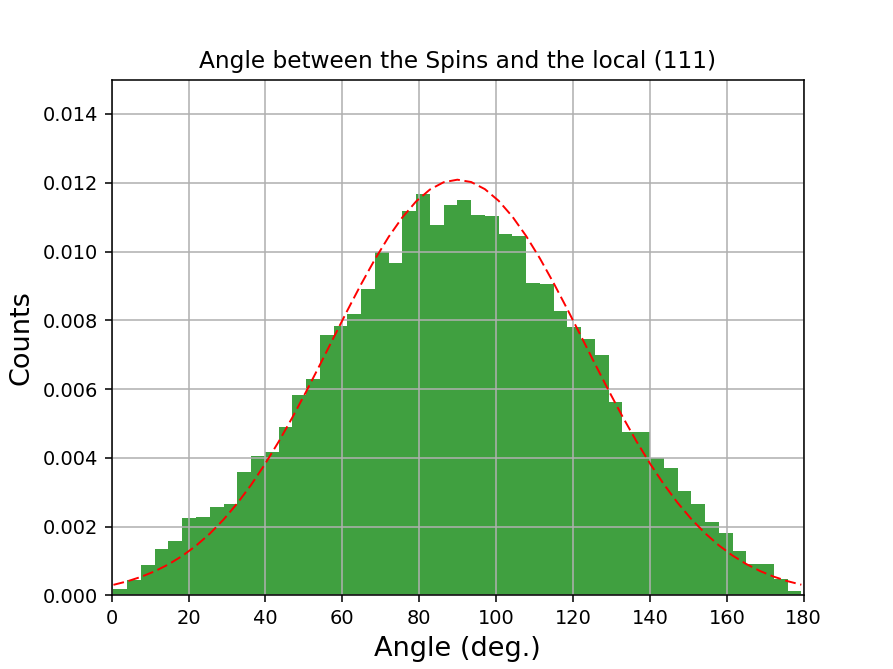

In [28]:
# Ａｎｇｌｅｓ　ｂｅｔｗｅｅｎ　ｔｈｅ　ｓｐｉｎｓ　ａｎｄ　ｔｈｅ　ｌｏｃａｌ　１１１
# anisotropy axis for atom 0,1,2,3... 14,15
aniso = np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],
                  [1,-1,-1],[1,-1,-1],[1,-1,-1],[1,-1,-1],
                  [-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],
                  [-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1]])/np.sqrt(3.)
# innerp = np.multiply(spins[0,0,0,0,:,:],aniso)#.sum(axis=1)
innerp = np.multiply(spins[:,:,:,:,:,:],aniso).reshape([-1,3]).sum(axis=1)
angle = np.arccos(innerp)*180./3.1415
print  angle.shape

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
% matplotlib notebook
# the histogram of the data
n, bins, patches = plt.hist(angle, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
mu, sigma = 90, 33
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Angle (deg.)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.title(r'Angle between the Spins and the local (111)')
plt.axis([0, 180, 0, 0.015])
plt.grid(True)

plt.show()

(4320L, 3L)
[ 0.97602639  2.47783614  1.27269728]
[[ 0.29654248  0.67302133  0.16269356]
 [ 0.57580933 -0.48446295 -0.28256393]
 [ 0.87234751 -0.87939723 -1.34515528]
 ..., 
 [-0.3661627  -0.07787594  0.52015133]
 [-0.32430923  0.3619884   0.57173669]
 [-0.5527913  -0.57814408 -0.28870051]]


<IPython.core.display.Javascript object>


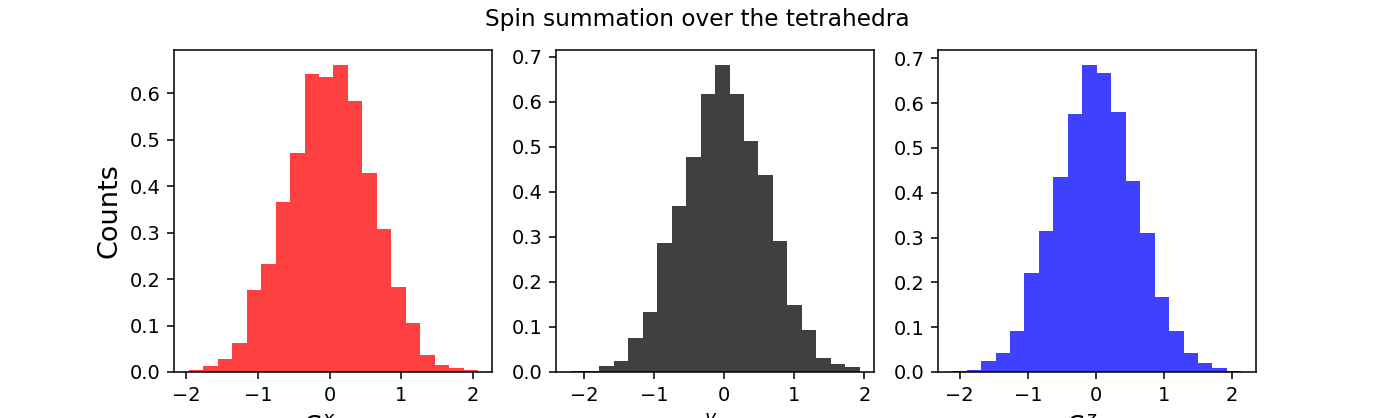

In [29]:
# Ｓｕｍ　ｔｈｅ　ｓｐｉｎｓ　ｏｎｅ　ｅｖｅｒｙ　ｔｅｔｒａｈｅｄｒａ

# Test sum over tetrahedra
# tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')
# #print tetra[0,:]
# first = spins[0,:,:,:,tetra[0,:],:]
# print first.shape#.sum(axis=1)
# print np.shape(first.sum(axis=0))
# print first.sum(axis=0)[0,0,0,:]
# print np.shape(np.reshape(first.sum(axis=4),(-1,3)))

# vetex of the tetrahedra (the tetraheda between the unit cell are ignored)
tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')

# n = 0 # which file to see
# sumTetra = np.vstack((spins[n,:,:,:,tetra[0,:],:].sum(axis=0).reshape((-1,3)),
#                       spins[n,:,:,:,tetra[1,:],:].sum(axis=0).reshape((-1,3)),
#                       spins[n,:,:,:,tetra[2,:],:].sum(axis=0).reshape((-1,3)),
#                       spins[n,:,:,:,tetra[3,:],:].sum(axis=0).reshape((-1,3))) )

# Or see all together
sumTetra = np.vstack((spins[:,:,:,:,tetra[0,:],:].sum(axis=4).reshape((-1,3)),
                      spins[:,:,:,:,tetra[1,:],:].sum(axis=4).reshape((-1,3)),
                      spins[:,:,:,:,tetra[2,:],:].sum(axis=4).reshape((-1,3)),
                      spins[:,:,:,:,tetra[3,:],:].sum(axis=4).reshape((-1,3))) )
print sumTetra.shape
print sumTetra.sum(axis=0)
print sumTetra

# Plot the histogram of the three components of the summation on every tetrahedra
fig,axs =plt.subplots(1,3,figsize=[10,3])
alpha = 0.75;
n, bins, patches = axs[0].hist(sumTetra[:,0], 20, normed=1, facecolor='red', alpha=alpha)
n, bins, patches = axs[1].hist(sumTetra[:,1], 20, normed=1, facecolor='black', alpha=alpha)
n, bins, patches = axs[2].hist(sumTetra[:,2], 20, normed=1, facecolor='blue', alpha=alpha)

axs[0].set_xlabel(r'$S^x_\mathrm{total}$',fontsize=14)
axs[1].set_xlabel(r'$S^y_\mathrm{total}$',fontsize=14)
axs[2].set_xlabel(r'$S^z_\mathrm{total}$',fontsize=14)
axs[0].set_ylabel('Counts',fontsize=14)

plt.suptitle('Spin summation over the tetrahedra')
# the spin length is normalized to be one!!!!!
#% matplotlib qt
#plt.axis([0, 180, 0, 0.015])
#plt.grid(True)
plt.show()

In [8]:
#################### Method 1: Plot scatter
%gui qt
from scipy import stats
from mayavi import mlab

x, y, z = sumTetra[:,0], sumTetra[:,1], sumTetra[:,2]
kde = stats.gaussian_kde(sumTetra.T) # this fun only accept 3 by x array
density = kde(sumTetra.T)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

(MainThread) loading preferences from <d:\Profile\kew\Anwendungsdaten\Enthought\mayavi_e3\preferences.ini>
(MainThread) loading preferences from <<open file 'C:\\Users\\kew\\AppData\\Local\\Continuum\\Anaconda2\\lib\\site-packages\\mayavi\\preferences\\preferences.ini', mode 'rb' at 0x000000000BCC2DB0>>
(MainThread) loading preferences from <<open file 'C:\\Users\\kew\\AppData\\Local\\Continuum\\Anaconda2\\lib\\site-packages\\tvtk\\plugins\\scene\\preferences.ini', mode 'rb' at 0x000000000D8EB270>>
(MainThread) Engine [<mayavi.core.engine.Engine object at 0x000000001BE51620>] named Engine1 registered
(MainThread) ---------- starting GUI event loop ----------


In [9]:
#################### Method 2: Plot iso_surface
# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
print xmin, ymin, zmin
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) # make gridpts to be 3 by X array
density = kde(coords).reshape(xi.shape) # clc the PDF and then reshape to a grid


In [10]:
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
vmin = density.min()
vmax = density.max()
print vmin, vmax
#mlab.pipeline.volume(grid)#, vmin=min, vmax=min + .5*(max-min))
mlab.points3d(0., 0., 0., scale_mode='none', scale_factor=0.07)
isos = mlab.pipeline.iso_surface(grid,opacity=0.5,transparent=True,
                              vmin=vmin,vmax=vmax,contours=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.11,0.13,
                                                            0.15,0.17,0.18,0.21,0.23,0.25,0.27,0.29])
mlab.axes()
mlab.show()

In [20]:
# ｔｈｅ　ａｎｇｌｅ　ｏｆ　ｔｈｅ　ｓｐｉｎｓ　ｏｎ　ｔｈｅ　ｓｉｘ　ｂｏｎｄｓ　ｏｆ　ａ　ｔｅｔｒａｈｅｄｒａ
tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')

# print spins[0, 0, 0, 0,tetra[0,:],:].dot(spins[0, 0, 0, 0,tetra[0,:],:].T)
# print spins[0, 0, 0, 0,tetra[1,:],:].dot(spins[0, 0, 0, 0,tetra[1,:],:].T)
# print spins[0, 0, 0, 0,tetra[2,:],:].dot(spins[0, 0, 0, 0,tetra[2,:],:].T)
# print spins[0, 0, 0, 0,tetra[3,:],:].dot(spins[0, 0, 0, 0,tetra[3,:],:].T)

#print np.swapaxes(spins[:,:,:,:,tetra[0,:],:],4,5).shape

ibonds = np.zeros([1,6])
for i in np.arange(0,5):# the five tetrahedra
    itetra = spins[:,:,:,:,tetra[i,:],:]
    itetraT = np.swapaxes(itetra,4,5)    
    #4by3 spin matrix on a tetrahedra dot 3by4 spin matrix on the same tetrahedar,  get a 4by4 matrix
    dotp = np.matmul(itetra,itetraT)
    #test = np.einsum('ijklmn,ijklnm->ijklnn',itetra,itetraT) #not working
    #dotp = itetra.dot(itetraT) # this one will cal throughout all the tetrahedra
    #print dotp[0,0,0,0,:,:]
    
    rows = (np.reshape(dotp, [-1,16])[:,[1,2,3,6,7,11]])# take the six off-diagnal elements
    rows.sort(axis=1)
    ibonds = np.vstack((ibonds,rows))
    print ibonds.shape
#print ibonds    

(1081L, 6L)
(2161L, 6L)
(3241L, 6L)
(4321L, 6L)
(5401L, 6L)


<IPython.core.display.Javascript object>


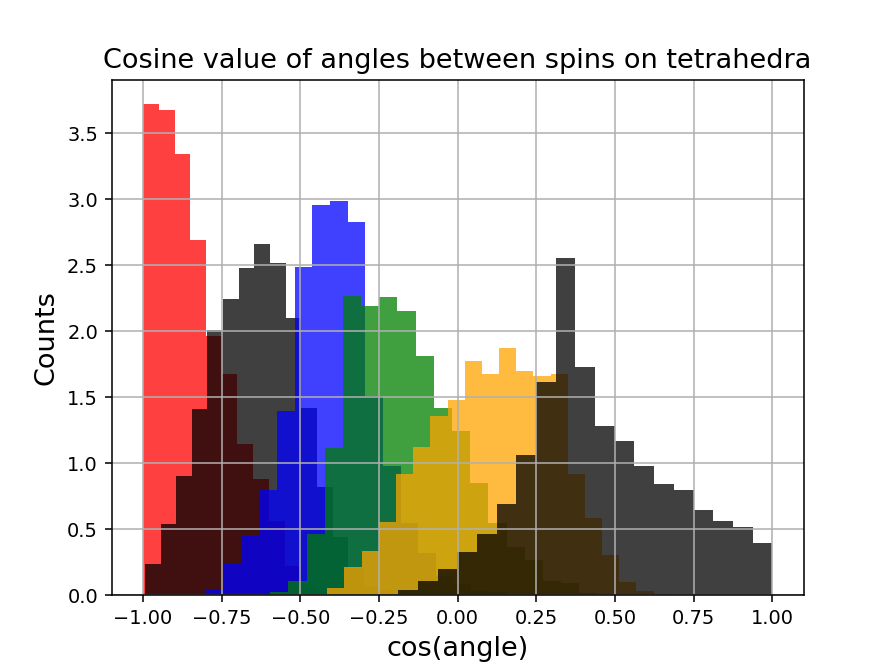

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fig,ax =plt.subplots(1,1)
# the histogram of the data
alpha = 0.75;
n, bins, patches = ax.hist(ibonds[:,0], 20, normed=1, facecolor='red', alpha=alpha)
n, bins, patches = ax.hist(ibonds[:,1], 20, normed=1, facecolor='black', alpha=alpha)
n, bins, patches = ax.hist(ibonds[:,2], 20, normed=1, facecolor='blue', alpha=alpha)
n, bins, patches = ax.hist(ibonds[:,3], 20, normed=1, facecolor='green', alpha=alpha)
n, bins, patches = ax.hist(ibonds[:,4], 20, normed=1, facecolor='orange', alpha=alpha)
n, bins, patches = ax.hist(ibonds[:,5], 20, normed=1, facecolor='black', alpha=alpha)

plt.xlabel('Angle (deg.)')
plt.ylabel('Probability')

x = np.linspace(1,5401,num=5400,endpoint=False)
#ax[1].scatter(x,ibonds[1:,0])
# ax[1].scatter(x,ibonds[1:,1])
# ax[1].scatter(x,ibonds[1:,2])
# ax[1].scatter(x,ibonds[1:,3])
# ax[1].scatter(x,ibonds[1:,4])
# ax[1].scatter(x,ibonds[1:,5])


plt.xlabel('cos(angle)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
#plt.axis([0, 180, 0, 0.015])
plt.title('Cosine value of angles between spins on tetrahedra',fontsize=14)
plt.grid(True)
plt.show()

In [196]:
print np.arccos(0.17)*180/3.1415
np.arccos(0.57)*180/3.1415

80.2145466751


55.251403751305347

In [22]:
# ｔｈｅ ｒｅｌａｔｉｖｅ　ｐｏｓｉｔｉｏｎ　ｏｆ　ｔｈｅ　ｔｗｏ　ａｎｔｉｆｅｒｒｏｍａｇｎｅｔｉｃ　ｂｏｎｄｓ　ｏｎ　ａ　ｔｅｔｒａｈｅｄｒａ
''' spin orientations on a tetrhedra is a 4by3 matrix, multiplying with its transpose, 
we got the spin innter product on the tetrahedra, a 4 by 4 matrix,
   00 01 02 03     0  1  2  3
   10 11 12 13     4  5  6  7 
   20 21 22 23     8  9  10 11
   30 31 32 33     12 13 14 15
   the bonds with no common index is opposit with each other on the tetra, that is 01-23,02-13,03-12,
   and after reshape to be 1 by 16, the index [1,2,3,6,7,11] gives the inner product, 
   now the opposite bonds are 1-11, 2-7, 3-6
'''

# The index of the spins on the five tetrahedra
tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')

# Cal. the inner product of the spin orientations on every tetrahedra:
# 'spins' has shape [5,6,6,6,4,3], we will get ibonds with dim. [5,6,6,6,4,4] whose last two axis is the product matrix
ibonds = np.zeros([1,6])
for i in np.arange(0,5):# the five tetrahedra
    itetra = spins[:,:,:,:,tetra[i,:],:]
    itetraT = np.swapaxes(itetra,4,5)    
    #4by3 spin matrix on a tetrahedra dot 3by4 spin matrix on the same tetrahedar,  get a 4by4 matrix
    dotp = np.matmul(itetra,itetraT)
    rows = (np.reshape(dotp, [-1,16])[:,[1,2,3,6,7,11]])# take the six off-diagnal elements
    ibonds = np.vstack((ibonds,rows))
    print ibonds.shape

bondInM = np.array([1,2,3,6,7,11]) # matrix element index for the six bonds
idx_antibonds = np.argpartition(ibonds[1:,:],1, axis=1)[:,:2]# the indexes of the two smallest inner product in the row

print 'the antiferromagnetic coupled spins are on bonds (the opposite bonds are 1-11, 2-7, 3-6 within the idx of Matrix)'
print '\n', bondInM[idx_antibonds]
  
sortedIdx =np.sort(bondInM[idx_antibonds],axis=1)
logicValue = ((sortedIdx== [1, 11])|(sortedIdx== [2, 7]))|(sortedIdx== [3,6])
intValue = np.array(logicValue.astype('int'))

nbTot = intValue.shape[0]
nbOfyes = np.count_nonzero(intValue[:,0]*intValue[:,1])
nbOfno = nbTot - nbOfyes
print 'How much are the the antiferromagnetically coupled spins on oppositting bonds'
print nbOfyes, nbOfno, np.float(nbOfyes)/nbTot

(1081L, 6L)
(2161L, 6L)
(3241L, 6L)
(4321L, 6L)
(5401L, 6L)
the antiferromagnetic coupled spins are on bonds (the opposite bonds are 1-11, 2-7, 3-6 within the idx of Matrix)

[[2 7]
 [3 6]
 [3 7]
 ..., 
 [1 6]
 [3 6]
 [1 7]]
How much are the the antiferromagnetically coupled spins on oppositting bonds
3770 1630 0.698148148148


In [ ]:
a = np.array([90,10,30,40,80,70,20,50,60,0])
print np.partition(a, 1)# the kth smallest is put a the kth, before it is the smaller, after it is larger. 
print np.argpartition(a, 1)[:2]

In [23]:
# ｔｈｅ　ａｎｇｌｅ　ｂｅｔｗｅｅｎ　ｔｈｅ　ｂｏｎｄ　ａｎｄ　ａｎｔｉｆｅｒｒｏｍａｇｎｅｔｉｃａｌｌｙ　ｃｏｕｐｌｉｎｇ　ｓｐｉｎｓ　
# The index of the spins on the five tetrahedra
tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')

# The corresponding r and spin id of the matrix elements of the inner product of the spin orientations on a tetrahedra
bondr = np.zeros([16,3])# store the r of the 16 bonds on a tetrahedra including self bonds, reversed bonds
spinId = np.zeros([16,2])# store the spin indexes of the 16 bonds on the tetrahedra

bondOnM = np.array([1,2,3,6,7,11])# 4spins dot 4spins matrix element indexes for the six bonds without self bonds and the reversed

# Cal. the inner product of the spin orientations on every tetrahedra:
coss=np.zeros([5*6*6*6*2*5,2]) # two spins per bond, two bonds per tetra.
idxCos = 0
for i in np.arange(0,5):# the five types of tetrahedra
    itetra = spins[:,:,:,:,tetra[i,:],:]
    itetraT = np.swapaxes(itetra,4,5)    
    #4by3 spin matrix on a tetrahedra dot 3by4 spin matrix on the same tetrahedar,  get a 4by4 matrix
    # 'spins' has shape [5,6,6,6,4,3], we will get dotp with dim. [5,6,6,6,4,4] whose last two axis is the product matrix
    dotp = np.matmul(itetra,itetraT)
    rows = (np.squeeze(np.reshape(dotp, [5,6,6,6,1,16]))[:,:,:,:,[1,2,3,6,7,11]])# take the six off-diagnal elements

    idx_antibondsR = np.argpartition(rows,1, axis=-1)[:,:,:,:,:2]#indexes of the two smallest inner product in the row
    idx_antibondsM = bondOnM[idx_antibondsR]# the coresponding bond idx in the matrix
    
    # Get the corresponding r and spin ID for the two bonds 
    idx = 0
    for ii in tetra[i,:]:# generate the r and spinId list coresponding to the 16 bonds on a tetrahedra
        for jj in tetra[i,:]:
            bondr[idx,:] = atpos[ii,:]-atpos[jj,:]
            spinId[idx,:]= [ii,jj]
            idx+=1
    bondrs = bondr[idx_antibondsM,:]
    spinIds = spinId[idx_antibondsM,:]  
    print idx_antibondsR.shape, idx_antibondsM.shape,bondrs.shape,spinIds.shape
    # Calcualte the Cos values of the angle betweens AFM spins and their bonds:
    # coss is a n by 2 array: every row is for the spins on a bonds, every two rows is for the bonds on a tetrahedra 
    for i0 in np.arange(0,5):
        for i1 in  np.arange(0,6):
            for i2 in  np.arange(0,6):
                for i3 in  np.arange(0,6):
                    for i4 in  np.arange(0,2):# loop bonds on a tetrahedra
                        spinsIdOnAbond = spinIds[i0,i1,i2,i3,i4,:].astype(int) # which two spins on this bond
                        bond_normed = bondrs[i0,i1,i2,i3,i4,:]/LA.norm(bondrs[i0,i1,i2,i3,i4,:])
                        coss[idxCos,:] = spins[i0,i1,i2,i3,spinsIdOnAbond,:].dot(bond_normed.T)
                        idxCos+=1
    print idxCos                    

print coss

(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
2160
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
4320
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
6480
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
8640
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
10800
[[-0.28417538 -0.38008314]
 [-0.04564821 -0.38736366]
 [ 0.21664458  0.1685498 ]
 ..., 
 [-0.12326546  0.15958787]
 [ 0.31011679  0.30086831]
 [-0.27630779 -0.34798325]]


<IPython.core.display.Javascript object>


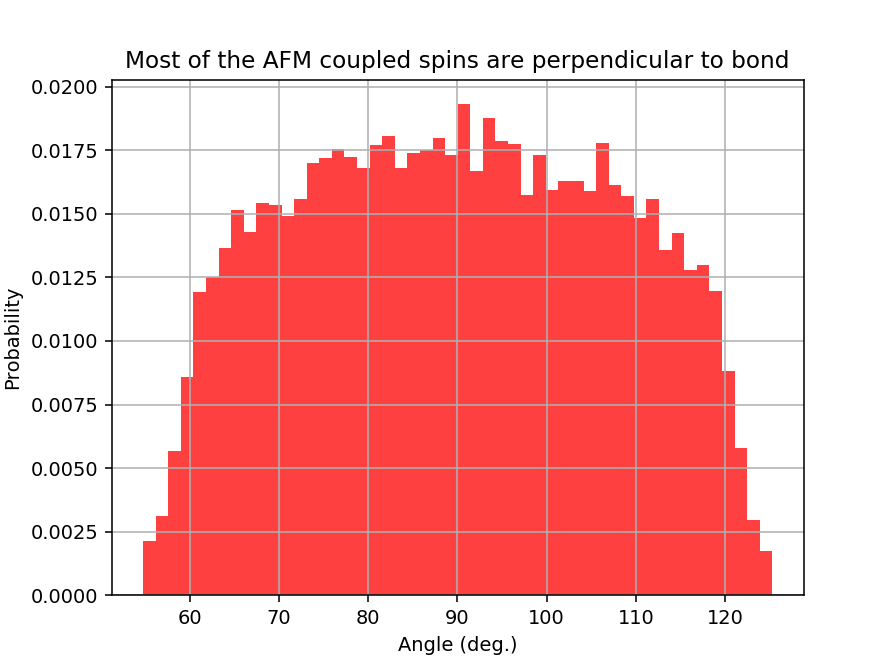

0.576814982886 -0.577349230156


In [24]:
fig,ax =plt.subplots(1,1)
# the histogram of the data
alpha = 0.75;
n, bins, patches = ax.hist(np.arccos(coss.ravel())*180/3.1415, 50, normed=1, facecolor='red', alpha=alpha)

plt.xlabel('Angle (deg.)')
plt.ylabel('Probability')

#plt.axis([0, 180, 0, 0.015])
plt.grid(True)
plt.title('Most of the AFM coupled spins are perpendicular to bond')
plt.show()
print coss.ravel().max(),coss.ravel().min()

In [25]:
# Ｄｉｓｔｉｇｕｉｓｈ　ｗｈｉｃｈ　ｔｙｐｅ　ｏｒｄｅｒ　ｇａｍｍａ5　ｏｒ　ｇａｍｍａ７
# the two pair of AFM spins, (s1,s2) and (s3,s4) and their positions (r1,r2) and (r3,r4)
# (s1+s3).dot(r1-r3), (s2+s4).dot(r2-r4), if it is 90deg, gamma5 or 45 deg, gamma7
# The index of the spins on the five tetrahedra
tetra = np.array([[0,4,8,13],[1,5,9,12],[2,6,10,15],[3,7,11,14],[0,5,15,11]],dtype='int')

# The corresponding r and spin id of the matrix elements of the inner product of the spin orientations on a tetrahedra
bondr = np.zeros([16,3])# The r of the 16 bonds on a tetrahedra including self bonds, reversed bonds
spinId = np.zeros([16,2])# The spin indexes of the 16 bonds on the tetrahedra

bondOnM = np.array([1,2,3,6,7,11])# 4spins dot 4spins matrix element indexes for the six bonds without self bonds and the reversed

# Cal. the inner product of the spin orientations on every tetrahedra:

ssDr=np.zeros([5*6*6*6*5,2]) # two spins per bond, two bonds per tetra.
idxCos = 0
for i in np.arange(0,5):# the four tetrahedra with the same orientation!!!!!!!
    itetra = spins[:,:,:,:,tetra[i,:],:]
    itetraT = np.swapaxes(itetra,4,5)    
    #4by3 spin matrix on a tetrahedra dot 3by4 spin matrix on the same tetrahedar,  get a 4by4 matrix
    # 'spins' has shape [5,6,6,6,4,3], we will get dotp with dim. [5,6,6,6,4,4] whose last two axis is the product matrix
    dotp = np.matmul(itetra,itetraT)
    rows = (np.squeeze(np.reshape(dotp, [5,6,6,6,1,16]))[:,:,:,:,[1,2,3,6,7,11]])# take the six off-diagnal elements

    idx_antibondsR = np.argpartition(rows,1, axis=-1)[:,:,:,:,:2]#indexes of the two smallest inner product in the row
    idx_antibondsM = bondOnM[idx_antibondsR]# the coresponding bond idx in the matrix
    
    # Get the corresponding r and spin ID for the two bonds 
    idx = 0
    for ii in tetra[i,:]:
        for jj in tetra[i,:]:
            bondr[idx,:] = atpos[ii,:]-atpos[jj,:]
            spinId[idx,:]= [ii,jj]
            idx+=1
    spinIds = spinId[idx_antibondsM,:]  
    print idx_antibondsR.shape, idx_antibondsM.shape,bondrs.shape,spinIds.shape
    
    for i0 in np.arange(0,5):
        for i1 in  np.arange(0,6):
            for i2 in  np.arange(0,6):
                for i3 in  np.arange(0,6):
                    spinsIdOnAbond0 = spinIds[i0,i1,i2,i3,0,0].astype(int)
                    spinsIdOnAbond1 = spinIds[i0,i1,i2,i3,1,0].astype(int)
                    tempS = spins[i0,i1,i2,i3,spinsIdOnAbond0,:]+spins[i0,i1,i2,i3,spinsIdOnAbond1,:]
                    tempS = tempS/np.linalg.norm(tempS)
                    tempR = atpos[spinsIdOnAbond0,:] - atpos[spinsIdOnAbond1,:]
                    tempR = tempR/LA.norm(tempR)
                    ssDr[idxCos,0] = tempS.dot(tempR)
                    
                    spinsIdOnAbond0 = spinIds[i0,i1,i2,i3,0,1].astype(int)
                    spinsIdOnAbond1 = spinIds[i0,i1,i2,i3,1,1].astype(int)
                    tempS = spins[i0,i1,i2,i3,spinsIdOnAbond0,:]+spins[i0,i1,i2,i3,spinsIdOnAbond1,:]
                    tempS = tempS/LA.norm(tempS)
                    tempR = atpos[spinsIdOnAbond0,:] - atpos[spinsIdOnAbond1,:]
                    tempR = tempR/LA.norm(tempR)
                    ssDr[idxCos,1] = tempS.dot(tempR)
                    idxCos+=1
    print idxCos                    

print ssDr

(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
1080
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
2160
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
3240
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:55: RuntimeWarning: invalid value encountered in divide
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: invalid value encountered in divide


4320
(5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L) (5L, 6L, 6L, 6L, 2L, 3L) (5L, 6L, 6L, 6L, 2L, 2L)
5400
[[ 0.15989997 -0.0012309 ]
 [-0.12123263  0.08475519]
 [ 0.18247144         nan]
 ..., 
 [ 0.97486875 -0.37196711]
 [-0.73762057 -0.81993283]
 [ 0.99963741 -0.97925231]]


<IPython.core.display.Javascript object>


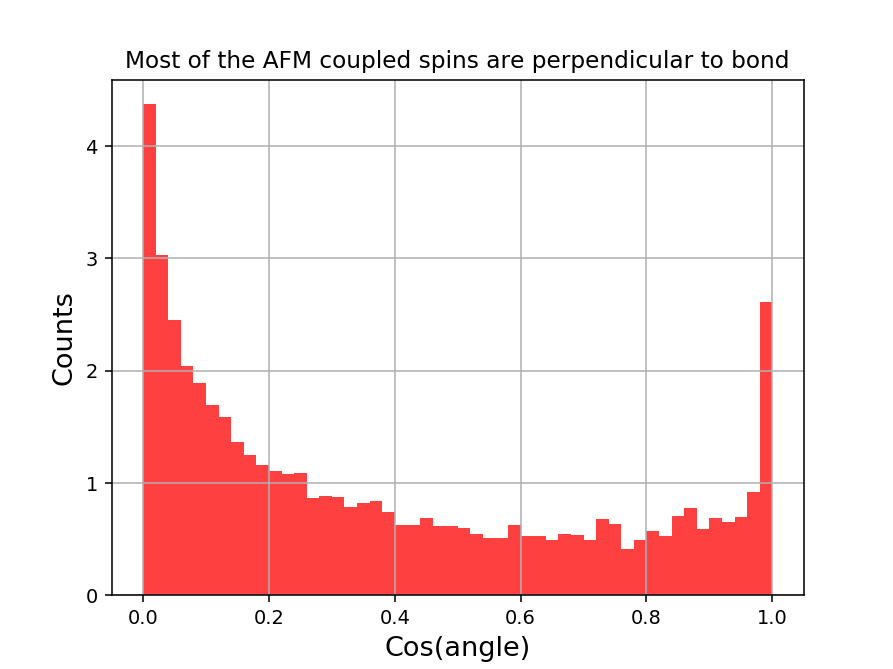

In [26]:
fig,ax =plt.subplots(1,1)
# the histogram of the data
alpha = 0.75;
ssDr = np.abs(ssDr.ravel())
ssDr = ssDr[~np.isnan(ssDr)]
n, bins, patches = ax.hist(ssDr, 50, normed=1, facecolor='red', alpha=alpha)

plt.xlabel('Cos(angle)',fontsize=14)
plt.ylabel('Counts',fontsize=14)

#plt.axis([0, 180, 0, 0.015])
plt.grid(True)
plt.title('Most of the AFM coupled spins are perpendicular to bond')
plt.show()


In [5]:
####Second Copy the needed data and clc bonds #################

boxnb = 2 # which file to view
viewbox = np.array([[0,0,0],[1,1,1]]) # the cells to view: the cubic diagnal 
viewbox = np.array([[2,2,2],[4,4,4]]) 

atot = np.prod(viewbox[1,:] - viewbox[0,:])*16 # the total nb of atoms to in the view box
allpos=np.zeros([atot,3])#store atom positons in a super cell
spin =np.zeros([atot,3])#store spins in a super cell

i = 0
for i1 in np.arange(viewbox[0,0],viewbox[1,0],1):
    for i2 in np.arange(viewbox[0,1],viewbox[1,1],1):
        for i3 in np.arange(viewbox[0,2],viewbox[1,2],1):
            for i4 in np.arange(0,16,1):
                allpos[i,:]= poss[boxnb,i1,i2,i3,i4,:]
                spin[i,:]=spins[boxnb,i1,i2,i3,i4,:]
                i=i+1

allpos = np.subtract(allpos,np.array([0.5,0.5,0.5])+(viewbox[1,:] - viewbox[0,:])/2) # shift the atoms to close to zero
bonds = np.zeros([5,2000])#store the 30 bonds in the unitCell: atom1,atom2,pos[a2]-pos[a1]
idx = 0
for i in np.arange(0,len(allpos)-1,1):
    for ii in np.arange(i+1,len(allpos),1):
        distance = LA.norm(allpos[i]-allpos[ii])
        if distance==np.sqrt(2)/4 and ~np.in1d(ii,bonds[0,np.where(bonds[1,:]==i)])[0]:
            bonds[:,idx]=np.append(np.array([i, ii]),allpos[ii]-allpos[i])
            idx +=1 

In [6]:
###Third Plot the magnetic structure #################
scene1 = canvas(title='MagStr', width=1000, height=1000,x=500,y=500, center=(0,0,0),
                 background=color.black,exit=False)

spinl = 0.2; atomr = 0.5; cylr = 0.005
allpos = np.subtract(allpos,np.array([0.5,0.5,0.5]))
for i in range(len(allpos)):
    #ii = i+16
    pointer = arrow(pos=allpos[i]-spinl*spin[i]/2, axis=spinl*spin[i])
    pointer = sphere(pos=allpos[i], color=color.red, radius=atomr*0.1)
    
for i in range(bonds.shape[1]):
    pointer = cylinder(pos=allpos[bonds[0,i]], axis=bonds[2:,i], radius=cylr,materials=materials.wood)
    
scene1.lights = []
scene1.ambient=2

<IPython.core.display.Javascript object>

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [81]:
#### plot the statiscs of spin orientatons #######

# prepare data: include the whole superlattice
boxnb = np.array([0])#1,2,3,4]) # which file to view: all the 5 files
viewbox = np.array([[0,0,0],[6,6,6]]) # the cells to view (specify the cubic diagnal): while supercell
atot = np.prod(viewbox[1,:] - viewbox[0,:])*16*len(boxnb) # the total nb of atoms to in the view box

# Copy the data needed
#allpos=np.zeros([atot,3])#store atom positons in a super cell
spin =np.zeros([atot,3])#store spins in a super cell
i = 0
for i0 in boxnb:
    for i1 in np.arange(viewbox[0,0],viewbox[1,0],1):
        for i2 in np.arange(viewbox[0,1],viewbox[1,1],1):
            for i3 in np.arange(viewbox[0,2],viewbox[1,2],1):
                for i4 in np.arange(0,16,1):
                    #allpos[i,:]= poss[boxnb,i1,i2,i3,i4,:]
                    spin[i,:]=spins[i0,i1,i2,i3,i4,:]
                    i=i+1

In [82]:
################### Plot the spin orientation density distribution ###################
# The key piont is that using scipy.stats to get a density function

#################### Method 1: Plot scatter
#%gui qt
from scipy import stats
from mayavi import mlab

x, y, z = spin[:,0], spin[:,1], spin[:,2]
#x, y, z = np.hsplit(spin,3) # not working: hsplit give 3400*1 matrix not 3400 col array
kde = stats.gaussian_kde(spin.T) # this fun only accept 3 by x array
density = kde(spin.T)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

In [86]:
### Not good     Method 2: use vollum or iso_surface and plot on a 3D grid
from scipy import stats
from mayavi import mlab
import numpy as np
#Next, to evaluate the gaussian kde on a grid:
x, y, z = spin[:,0], spin[:,1], spin[:,2]

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) # make gridpts to be 3 by X array
density = kde(coords).reshape(xi.shape) # clc the PDF and then reshape to a grid
#print(xi.shape,yi.shape,coords.shape,density.shape)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
min = density.min()
max = density.max()
#mlab.pipeline.volum(grid, vmin=min, vmax=min + .5*(max-min))
mlab.points3d([0],[0],[0], scale_factor=2)
mlab.pipeline.iso_surface(grid,opacity=0.5,transparent=True,
                          contours=[0.1,0,0.2,0.3,0.4,0.5,0.6])
mlab.axes()
mlab.show()

In [84]:
### Method3: use mesh (Ref. mayavi example ploting spherical harmanics)
from mayavi import mlab
from scipy import stats
from mayavi.modules.orientation_axes import OrientationAxes
import numpy as np

# Creat the density fun.
kde = stats.gaussian_kde(spin.T) # this fun only accept 3*xxx array

# Create a sphere
r = 1; pi = np.pi; cos = np.cos; sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]
x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)
#print(x.shape, z.shape)

# Process the coordination and clc the density
coords = np.vstack([item.ravel() for item in [x, y, z]]) 
density = kde(coords).reshape(x.shape)
# Plot
mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()
# Plot the density distribution on a spherical surface
m = mlab.mesh(x, y, z, scalars=density, colormap='RdBu')
m.module_manager.scalar_lut_manager.reverse_lut = True
mlab.colorbar(orientation='vertical',nb_labels=5, label_fmt='%.2f')
m.module_manager.scalar_lut_manager.data_range =np.array([ 0.1 ,  0.3])
m.module_manager.scalar_lut_manager.scalar_bar.width = 0.05
mlab.outline()
# Plot the reprenzation of the density distribution to the coordination 
density /= density.max()
m = mlab.mesh(density*x, density*y, density*z+2,scalars=density, colormap='RdBu')
m.module_manager.scalar_lut_manager.reverse_lut = True
mlab.outline()
#mlab.axes(xlabel=r"X",ylabel="Y",zlabel="Z",nb_labels=0)

# add module orientationAxes
e = mlab.get_engine() # get the engine
oa = OrientationAxes()
oa.axes.normalized_label_position = np.array([ 1. ,  1. ,  1.5]) # why not working
oa.axes.total_length = np.array([ 1.5 ,  1.5 ,  1.5])
e.add_module(oa)

# add the local 111 directions
import itertools
permu=list(itertools.product([-1,1], repeat=3));#print(permu,type(permu))
loc=np.array(permu)
for i in loc:
    temp = np.vstack([[0,0,0],i])
    #print(temp)
    x, y, z = temp[:,0],temp[:,1],temp[:,2]
    mlab.plot3d(x,y,z,color=(0,0,0), tube_radius=0.05)

#mlab.view(90, 70, 6.2, (-1.3, -2.9, 0.25))
#mlab.savefig('D:/9_Program files/SpinVert/gdzro_ill/fullprof/spins_stas.png')  
mlab.show()

In [19]:
##### Method2 use matplotlib
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

x, y, z = spin[:,0].T, spin[:,1].T, spin[:,2].T

xyz = np.vstack([x,y,z])
#print(spin.shape,xyz.shape)
density = stats.gaussian_kde(xyz)(xyz) 
# sort (not necessary)
idx = density.argsort()
x, y, z, density = x[idx], y[idx], z[idx], density[idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=density)
ax.axis("equal")
plt.show()

In [17]:
### Not good: just plot point without color to see the density

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# Create a sphere
r = 0.9; pi = np.pi; cos = np.cos; sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)
# spin end point
xx, yy, zz = np.hsplit(spin, 3) 

#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
ax.scatter(xx,yy,zz,color="r",s=20)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_aspect("equal")
plt.tight_layout()
plt.show()
                
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# surf = ax.plot_surface(spin[:,0],spin[:,1],spin[:,2], rstride=1, cstride=1, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)                
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()
############
# #binning the pattern clc. by me#######
# H, edges= np.histogramdd(spins,bins=10,normed=False)
# #print edges, H
# #Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# # Plot 2D histogram using pcolor
# fig = plt.figure()
# plt.pcolormesh(xedges,yedges,H.T)
# plt.xlabel('x')
# plt.ylabel('y')
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('Intensity')

In [ ]:
######## A example 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,21), np.linspace(0,1,21))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)
#print(X,Y,data)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
print(X.shape,Y.shape,data.shape)
#cset = ax2.contourf(X, Y, data, 100, zdir='z', offset=0.5, cmap=cm.BrBG)
cset = ax2.contourf(x, y, z, 5,  offset=0.5, cmap=cm.BrBG)
ax2.set_zlim((0.,1.))

plt.colorbar(cset)
plt.show()

In [ ]:
############ Example: plot a sphere
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
#print(x.shape,y.shape,z.shape)
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

plt.show()

In [ ]:
###### Below are some test for Vpython
scene.material = materials.wood # default material for all objects
box(pos=(-2,0,0), color=color.red)
box(pos=(2,0,0), color=color.green, material=materials.wood)
cylinder(pos=(0,-0.5,0), radius=1, axis=(0,1,0), color=color.orange)
s = sphere(pos=(-2,0.8,0), radius=0.3, color=color.cyan,
           material=materials.emissive)
local_light(pos=s.pos, color=s.color)

lframe = frame()
for obj in scene.lights:
    if isinstance(obj, distant_light):
        obj.frame = lframe # put distant lights in a frame
old = vector(scene.forward) # keep a copy of the old forward
while 1:
    rate(50)
    if scene.forward != old:
        new = scene.forward
        axis = cross(old,new)
        angle = new.diff_angle(old)
        lframe.rotate(axis=axis, angle=angle)
        old = vector(new)

scene.ambient # see ambient lighting (note it is colored light)
scene.ambient = 1.4 # Set ambient to an intensity of white

In [ ]:
scene2 = canvas(title='Bounce', width=500, height=500,x=500,y=500, center=(0,0,0),
                 background=(0.1,0.1,0.1),exit=False)

print("""
Right button drag to rotate "camera" to view scene.
  On a one-button mouse, right is Command + mouse.
Middle button to drag up or down to zoom in or out.
  On a two-button mouse, middle is left + right.
  On a one-button mouse, middle is Option + mouse.
""")

side = 4.0
thk = 0.3
s2 = 2*side - thk
s3 = 2*side + thk
wallR = box (pos=( side, 0, 0), length=thk, height=s2,  width=s3,  color = color.red)
wallL = box (pos=(-side, 0, 0), length=thk, height=s2,  width=s3,  color = color.red)
wallB = box (pos=(0, -side, 0), length=s3,  height=thk, width=s3,  color = color.blue)
wallT = box (pos=(0,  side, 0), length=s3,  height=thk, width=s3,  color = color.blue)
wallBK = box(pos=(0, 0, -side), length=s2,  height=s2,  width=thk, color = (0.7,0.7,0.7))

ball = sphere (color = color.green, radius = 0.4)
ball.mass = 1.0
ball.p = vector (-0.15, -0.23, +0.27)

side = side - thk*0.5 - ball.radius

dt = 0.5
t=0.0
while True:
    rate(100)
    t = t + dt
    ball.pos = ball.pos + (ball.p/ball.mass)*dt
    if not (side > ball.x > -side):
        ball.p.x = -ball.p.x
    if not (side > ball.y > -side):
        ball.p.y = -ball.p.y
    if not (side > ball.z > -side):
        ball.p.z = -ball.p.z

In [ ]:
from ivisual import *
sphere()

In [ ]:
bond = []
print(len(bond))
a1 = np.array([0.1,0.2,0.3])
a2 = np.array([0.5,0.5,0.4])
a3 = np.append(np.array([1, 2]),a2-a1).T
a4 = np.vstack((a1,a2))
print(a4)
print(a4[:,1])
print(a4[0,np.where(a4[1,:]==0.5)])
a5 = np.in1d(0.1,a4[0,np.where(a4[1,:]==0.5)])
print(a5[0])

bond.append(a3)
print(a3,a4.shape[1],bond)
